# Project 2

# Used Vehicle Price Prediction

## Introduction

- 1.2 Million listings scraped from TrueCar.com - Price, Mileage, Make, Model dataset from Kaggle: [data](https://www.kaggle.com/jpayne/852k-used-car-listings)
- Each observation represents the price of an used car

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [2]:
data = pd.read_csv('dataTrain_carListings.zip')

In [3]:
data.head()

,Price,Year,Mileage,State,Make,Model
0,21490,2014,31909,MD,Nissan,MuranoAWD
1,21250,2016,25741,KY,Chevrolet,CamaroCoupe
2,20925,2016,24633,SC,Hyundai,Santa
3,14500,2012,84026,OK,Jeep,Grand
4,32488,2013,22816,TN,Jeep,Wrangler


In [4]:
data.shape

(500000, 6)

In [5]:
data.Price.describe()

count    500000.000000
mean      21144.186304
std       10753.259704
min        5001.000000
25%       13499.000000
50%       18450.000000
75%       26998.000000
max       79999.000000
Name: Price, dtype: float64

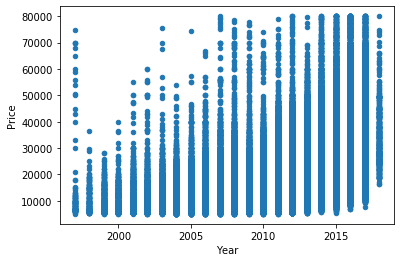

In [6]:
data.plot(kind='scatter', y='Price', x='Year');

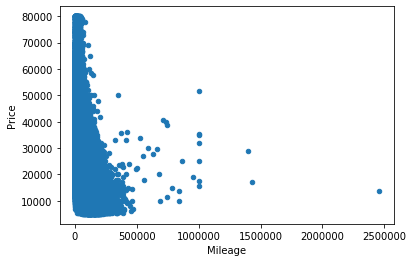

In [7]:
data.plot(kind='scatter', y='Price', x='Mileage');

In [8]:
data.columns

Index(['Price', 'Year', 'Mileage', 'State', 'Make', 'Model'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Price    500000 non-null  int64 
 1   Year     500000 non-null  int64 
 2   Mileage  500000 non-null  int64 
 3   State    500000 non-null  object
 4   Make     500000 non-null  object
 5   Model    500000 non-null  object
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


In [10]:
data_num = data.select_dtypes(include=["int64"])

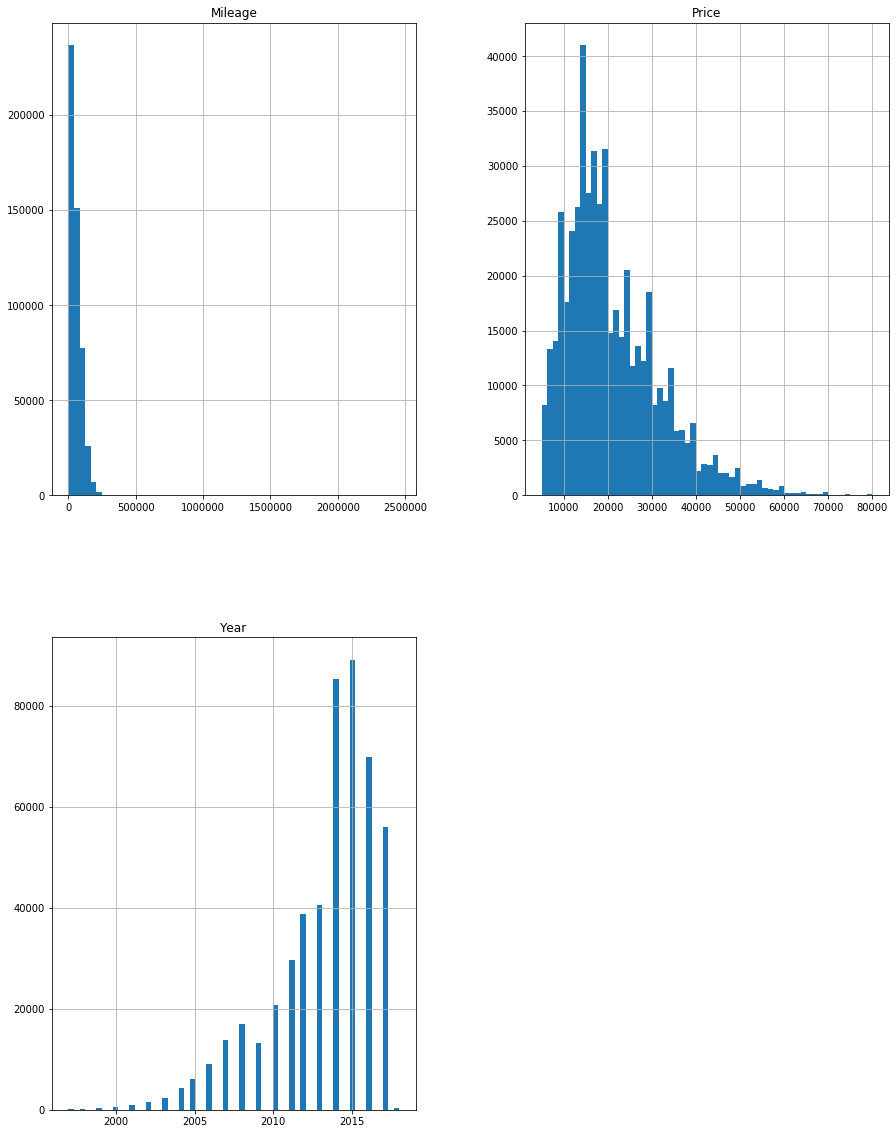

In [11]:
data_num.hist(figsize=(15,20),bins=60,xlabelsize=10,ylabelsize=10);

In [12]:
data1 = data.sample(frac=0.001, replace=True, random_state=1)
data1.shape

(500, 6)

In [13]:
tabla_valor_max=pd.DataFrame()
for i in range(len(data1.columns)):
  tbl = pd.DataFrame(data1[data1.columns[i]].value_counts())
  tbl_max = tbl.max()*100/data1.shape[0]
  tabla_valor_max = pd.concat((tabla_valor_max,tbl_max),axis=0, names=["concentracion_dat"])
  
tabla_valor_max = tabla_valor_max[tabla_valor_max[0]>10]
tabla_valor_max

,0
Year,20.2
State,12.6
Make,16.8


# Exercise P2.1 (50%)

Develop a machine learning model that predicts the price of the of car using as an input ['Year', 'Mileage', 'State', 'Make', 'Model']

#### Evaluation:
- 25% - Performance of the model using K-Fold (K=10) cross-validation
- 25% - Notebook explaining the modeling process


In [14]:
X = pd.get_dummies(data1,columns=['State', 'Make', 'Model'])
X = X.iloc[:,1:]
y = data1['Price']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,random_state=1)

print(f'  Tamaño del train: {len(X_train):,}')
print(f'   Tamaño del test: {len(X_test):,}')

  Tamaño del train: 350
   Tamaño del test: 150


In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

baggin_reg = BaggingRegressor()    
baggin_reg.fit(X_train, y_train)

y_pred_baggin = baggin_reg.predict(X_test)

cv_scores_baggin = cross_val_score(baggin_reg, X_train, y_train, cv=10, n_jobs=3)
print("R^2: {}".format(baggin_reg.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baggin))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_baggin)))

print(cv_scores_baggin)

R^2: 0.525887409632338
Root Mean Squared Error: 7678.656727575034
Mean 10-Fold CV Score: 0.324233373726075
[0.2425277  0.24125646 0.544613   0.35518207 0.1173546  0.38046135
 0.34092032 0.29978767 0.21805354 0.50217704]


In [18]:
# Tuning N-Stimators
# list of values to try for n_estimators
estimator_range = range(10, 200, 10)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for estimator in estimator_range:
    baggin_regF = BaggingRegressor(DecisionTreeRegressor(),bootstrap=True, oob_score=True,n_estimators=estimator, random_state=1, n_jobs=3)
    baggin_regF.fit(X_train, y_train)

    y_pred_baggin = baggin_regF.predict(X_test)

    cv_scores_baggin = cross_val_score(baggin_regF, X_train, y_train, cv=10, n_jobs=3)
    print("R^2: {}".format(baggin_regF.score(X_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_baggin))
    accuracy_scores.append(rmse)
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_baggin)))

    print(cv_scores_baggin)

C:\Users\Fabian Rodriguez\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:1056: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


R^2: 0.5412629908548472
Root Mean Squared Error: 7553.120235849553
Mean 10-Fold CV Score: 0.3127741249939834
[ 0.43215959  0.26172539  0.43423712  0.39741509 -0.007287    0.40876044
  0.36041584  0.30713052  0.12435301  0.40883125]
R^2: 0.5685876799347389
Root Mean Squared Error: 7324.715829798451
Mean 10-Fold CV Score: 0.32160854598887867
[0.40034432 0.35396729 0.48003197 0.38783545 0.04849956 0.40085609
 0.35620453 0.21558648 0.13330818 0.43945159]
R^2: 0.581370547698252
Root Mean Squared Error: 7215.383160691647
Mean 10-Fold CV Score: 0.34365258263943166
[0.40993396 0.35972581 0.48129937 0.39907751 0.12271524 0.42628134
 0.3741127  0.24035286 0.14829226 0.47473477]
R^2: 0.570920190472136
Root Mean Squared Error: 7304.887776711278
Mean 10-Fold CV Score: 0.34311050422818723
[0.3843353  0.33506976 0.47393606 0.3950525  0.14906821 0.41980299
 0.36384601 0.27245589 0.14392071 0.49361761]
R^2: 0.5687066213726513
Root Mean Squared Error: 7323.706039106703
Mean 10-Fold CV Score: 0.340700661

Text(0, 0.5, 'RMSE')

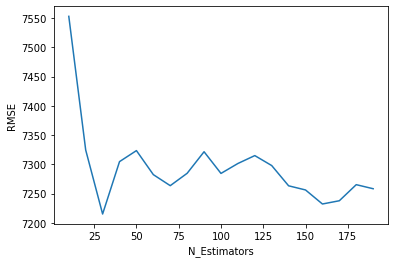

In [19]:
import matplotlib.pyplot as plt

plt.plot(estimator_range, accuracy_scores)
plt.xlabel('N_Estimators')
plt.ylabel('RMSE')

In [20]:
c = len(X.columns)
c = c+1
c

298

In [23]:
# Tuning Max_Features
# list of values to try for n_estimators
c = len(X.columns)
c = c+1
c
feature_range = range(1, c)

# list to store the average Accuracy for each value of n_estimators
accuracy_scores = []

# use 5-fold cross-validation with each value of n_estimators (WARNING: SLOW!)
for feature in feature_range:
    baggin_regF = BaggingRegressor(n_estimators=estimator, random_state=1, n_jobs=3)
    baggin_regF.fit(X_train, y_train)

    y_pred_baggin = baggin_regF.predict(X_test)

    cv_scores_baggin = cross_val_score(baggin_regF, X_train, y_train, cv=2, n_jobs=3)
    print("R^2: {}".format(baggin_regF.score(X_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_baggin))
    accuracy_scores.append(rmse)
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_baggin)))

    print(cv_scores_baggin)

R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5

R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5

R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5

R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5

R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5696951393775
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]
R^2: 0.5763442698636061
Root Mean Squared Error: 7258.5

Text(0, 0.5, 'RMSE')

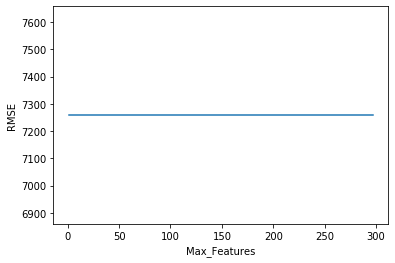

In [24]:
plt.plot(feature_range, accuracy_scores)
plt.xlabel('Max_Features')
plt.ylabel('RMSE')

In [29]:
#Mejor Baggin
baggin_regB = BaggingRegressor(n_estimators=160, max_features=40, random_state=1, n_jobs=3)    
baggin_regB.fit(X_train, y_train)

y_pred_baggin = baggin_regB.predict(X_test)

cv_scores_rf = cross_val_score(baggin_regB, X_train, y_train, cv=10, n_jobs=3)
print("R^2: {}".format(baggin_regB.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baggin))
print("Root Mean Squared Error: {}".format(rmse))
print("Mean 10-Fold CV Score: {}".format(np.mean(cv_scores_baggin)))

print(cv_scores_baggin)

R^2: 0.1778801954220901
Root Mean Squared Error: 10111.41799316172
Mean 10-Fold CV Score: 0.33183794479390116
[0.32651308 0.33716281]


In [31]:
#kfold a mano
from sklearn.model_selection import KFold
splitsKF = 10

kf = KFold(n_splits = splitsKF, shuffle = True)
baggin_regT = BaggingRegressor(n_estimators=190, max_features=40, random_state=1, n_jobs=3)

scores = []
for i in range(splitsKF):
    result = next(kf.split(X), None)
    x_train = X.iloc[result[0]]
    x_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = baggin_regT.fit(x_train,y_train)
    predictions = baggin_regT.predict(x_test)
    print("R^2: {}".format(baggin_regT.score(x_test, y_test)))
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    scores.append(model.score(x_test,y_test))
    accuracy_scores.append(rmse)
    print("Root Mean Squared Error: {}".format(rmse))
    print("Mean 10-Fold CV Score: {}".format(np.mean(scores)))


R^2: 0.15853307409958572
Root Mean Squared Error: 9372.550204367102
Mean 10-Fold CV Score: 0.15853307409958572
R^2: 0.1709447992494143
Root Mean Squared Error: 9027.684823646972
Mean 10-Fold CV Score: 0.16473893667450001
R^2: 0.12796390446499017
Root Mean Squared Error: 11656.272366627762
Mean 10-Fold CV Score: 0.1524805926046634
R^2: 0.18839834897182964
Root Mean Squared Error: 10697.933845882664
Mean 10-Fold CV Score: 0.16146003169645495
R^2: 0.18436919869288926
Root Mean Squared Error: 9671.74458370764
Mean 10-Fold CV Score: 0.16604186509574181
R^2: 0.21581176214301245
Root Mean Squared Error: 10346.827302935639
Mean 10-Fold CV Score: 0.1743368479369536
R^2: 0.11254471979582546
Root Mean Squared Error: 9373.452069110128
Mean 10-Fold CV Score: 0.16550940105964956
R^2: 0.18157620115291828
Root Mean Squared Error: 9877.634353850077
Mean 10-Fold CV Score: 0.16751775107130817
R^2: 0.20868467234050625
Root Mean Squared Error: 9712.753281797224
Mean 10-Fold CV Score: 0.1720918534345524
R^2

# Exercise P2.2 (50%)

Create an API of the model.

Example:
![](https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/notebooks/images/img015.PNG)

#### Evaluation:
- 40% - API hosted on a cloud service
- 10% - Show screenshots of the model doing the predictions on the local machine
